Выполните задания до 23:59 вторника. Добавьте код в этот файл и не забудьте подписать фамилию в его названии. 
Результат пришлите, пожалуйста, на почту aleksklimow@gmail.com.

**Задание 1.** Напишите регулярное выражение, которое найдёт кусочек строки, состоящий только из букв алфавита (т.е. найдет слова "кот", "и" в "кот и кот123", но не "кот123");

In [1]:
import re

def find_words(text):
    result = re.findall(r'\b[а-яА-Я]+\b', text)
    return result

text = 'кот и кот123 поймали кошку11 и собачку.'
print(find_words(text))

['кот', 'и', 'поймали', 'и', 'собачку']


**Задание 2.** Напишите функцию, которая извлечёт даты (т.е. "февраль 29 2012") из списка ниже. Результатом работы этой функции должен быть список доменных имён, не забудьте про **return**.

In [6]:
import re

def find_date(text_list):
    result = []
    for text in text_list:
        dates = re.findall(r'\b(?:Январь|Февраль|Март|Апрель|Май|Июнь|Июль|Август|Сентябрь|Октябрь|Ноябрь|Декабрь) \d{1,2}, \d{4}\b', text) # re.IGNORECASE # Полагаем, что месяца в форме ед. числа, им. падежа
        result.extend(dates)
    return result

clients = ['Номер клиента: 111, Дата: Февраль 29, 2012', 'Номер клиента: 112, Дата: Май 11, 2019', 'Номер клиента: 666, Дата: Май 6, 2016', 'Номер клиента: 42, Дата: Декабрь 24, 2020', 'Номер клиента: 100052, Дата: июль 23, 2021', 'Номер клиента: 564, Дата: Февраль 1, 2005', 'Номер клиента: 98, Дата: Август 11, 2015', 'Номер клиента: 187, Дата: Апрель 14, 2013', 'Номер клиента: 87, Дата: Октябрь 29, 1999', 'Номер клиента: 88, Дата: Ноябрь 24, 2015']
print(find_date(clients))

['Февраль 29, 2012', 'Май 11, 2019', 'Май 6, 2016', 'Декабрь 24, 2020', 'Февраль 1, 2005', 'Август 11, 2015', 'Апрель 14, 2013', 'Октябрь 29, 1999', 'Ноябрь 24, 2015']


**Задание 3.** Посчитайте частоты в следующем тексте, предварительно его лемматизировав, и визуализируйте график с распределением. Похож ли он на распределение по закону Ципфа?

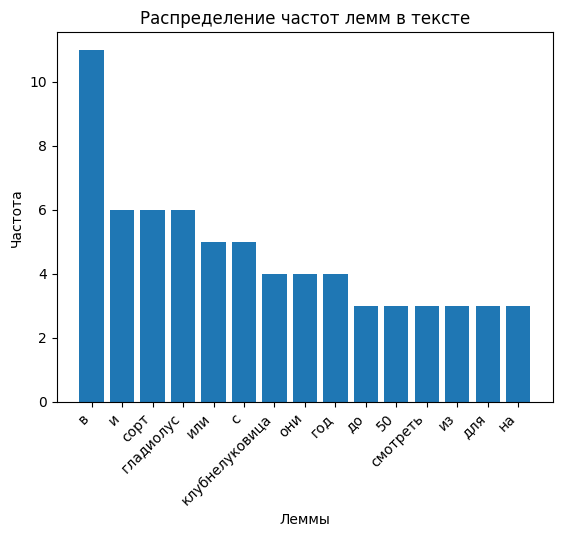

In [3]:
import re
import pymorphy3
import matplotlib.pyplot as plt
from collections import Counter

def lemmatize_text(text):
    morph = pymorphy3.MorphAnalyzer()
    words = re.findall(r'\b\w+\b', text)
    lemmas = [morph.parse(word)[0].normal_form for word in words]
    return lemmas

def plot_word_frequencies(word_frequencies, top_n=15):
    words, counts = zip(*word_frequencies.most_common(top_n))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Леммы')
    plt.ylabel('Частота')
    plt.title('Распределение частот лемм в тексте')
    plt.show()

text = '''Растения многолетние, клубнелуковичные. Клубнелуковица округлая, возобновляется ежегодно, одета плёнчатыми
чешуйками от белой до чёрно-вишнёвой окраски. Стебли прямые неветвящиеся, одиночные, облиственные,
50—150 см высотой. Листья тонкие, линейные или мечевидные, 50—80 см длиной, голубовато-зелёного цвета.
Влагалища листьев смыкаются вокруг стебля, придавая ему дополнительную прочность. Цветки собраны в одностороннее, 
двустороннее или спиральное колосовидное соцветие
до 80 см длиной, рыхлое, среднеплотное или плотное. Цветки сидячие с простым воронковидным околоцветником из шести
неодинаковых долей, сросшихся основаниями, различной величины и формы. Плод — трёхстворчатая коробочка. Семян много,
они круглые или овальные, коричневые. Размножают клубнелуковицами и клубнепочками (чаще их называют детками).
Используют в основном для срезки. Срезанные соцветия стоят в воде 10—12 суток. Единовременно в мире существует
около 5000 сортов гладиолусов. Старые сорта постепенно сходят со сцены (при вегетативном размножении накапливаются
дефекты копирования ДНК, а из-за этого жизнеспособность сорта постепенно снижается); считается, что средний
срок жизни сорта составляет порядка десяти лет. Однако есть и отдельные сорта-долгожители, успешно существующие
уже на протяжении трёх десятков лет. На смену старым сортам приходят новые, со всё более сложными и необычными окрасками,
сложной гофрировкой и улучшенными прочими признаками. Около 300 года до н. э. клубнелуковицы гладиолусов употребляли в пищу,
запекая их или используя в качестве основы для лепёшек, размалывая вместе с луком.
В I веке н. э. гладиолусы упоминаются Плинием в связи с их якобы магической силой уберегать воина от гибели
и приносить победу. Для достижения этой цели воину необходимо было повесить на шею клубнелуковицу гладиолуса
в качестве амулета. Диоскорид описал дикорастущие виды гладиолусов (Gladiolus segentum) в 50-е годы н. э. 
В Средние века муку из гладиолусов добавляли при выпекании хлеба.'''

lemmatized_text = lemmatize_text(text)
word_frequencies = Counter(lemmatized_text)
plot_word_frequencies(word_frequencies)

**Задание 4.** Разметьте текст выше любым из известных вам морфологических разметчиков. Подсчитайте количество наречий, предлогов, числительных, знаков пунктуации и подчинительных союзов в этом тексте (удобнее всего эти сведения будет сохранить в списки), затем посчитайте доли этих частей речи в тексте. Сведите всё в единую табличку с помощью **pandas**.

In [26]:
import pymorphy3
import pandas as pd

def analyze_text(text):
    morph = pymorphy3.MorphAnalyzer()
    words = text.split()
    
    adverbs_count = 0
    prepositions_count = 0
    numerals_count = 0
    punctuation_count = 0
    subordinate_conjunctions_count = 0

    for word in words:
        parsed_word = morph.parse(word)[0]
        pos = parsed_word.tag.POS

        if pos == 'ADVB':
            adverbs_count += 1
        elif pos == 'PREP':
            prepositions_count += 1
        elif pos == 'NUMR':
            numerals_count += 1
        elif 'PNCT' in parsed_word.tag:
            punctuation_count += 1
        elif pos == 'CONJ' and 'Subx' in parsed_word.tag:
            subordinate_conjunctions_count += 1

    total_words = len(words)

    adverbs_percentage = adverbs_count / total_words * 100
    prepositions_percentage = prepositions_count / total_words * 100
    numerals_percentage = numerals_count / total_words * 100
    punctuation_percentage = punctuation_count / total_words * 100
    subordinate_conjunctions_percentage = subordinate_conjunctions_count / total_words * 100

    data = {
        'Часть речи': ['Наречия', 'Предлоги', 'Числительные', 'Знаки пунктуации', 'Подчинительные союзы'],
        'Количество': [adverbs_count, prepositions_count, numerals_count, punctuation_count, subordinate_conjunctions_count],
        'Доля (%)': [adverbs_percentage, prepositions_percentage, numerals_percentage, punctuation_percentage, subordinate_conjunctions_percentage]
    }

    df = pd.DataFrame(data)
    return df

text = '''Растения многолетние, клубнелуковичные. Клубнелуковица округлая, возобновляется ежегодно, одета плёнчатыми
чешуйками от белой до чёрно-вишнёвой окраски. Стебли прямые неветвящиеся, одиночные, облиственные,
50—150 см высотой. Листья тонкие, линейные или мечевидные, 50—80 см длиной, голубовато-зелёного цвета.
Влагалища листьев смыкаются вокруг стебля, придавая ему дополнительную прочность. Цветки собраны в одностороннее, 
двустороннее или спиральное колосовидное соцветие
до 80 см длиной, рыхлое, среднеплотное или плотное. Цветки сидячие с простым воронковидным околоцветником из шести
неодинаковых долей, сросшихся основаниями, различной величины и формы. Плод — трёхстворчатая коробочка. Семян много,
они круглые или овальные, коричневые. Размножают клубнелуковицами и клубнепочками (чаще их называют детками).
Используют в основном для срезки. Срезанные соцветия стоят в воде 10—12 суток. Единовременно в мире существует
около 5000 сортов гладиолусов. Старые сорта постепенно сходят со сцены (при вегетативном размножении накапливаются
дефекты копирования ДНК, а из-за этого жизнеспособность сорта постепенно снижается); считается, что средний
срок жизни сорта составляет порядка десяти лет. Однако есть и отдельные сорта-долгожители, успешно существующие
уже на протяжении трёх десятков лет. На смену старым сортам приходят новые, со всё более сложными и необычными окрасками,
сложной гофрировкой и улучшенными прочими признаками. Около 300 года до н. э. клубнелуковицы гладиолусов употребляли в пищу,
запекая их или используя в качестве основы для лепёшек, размалывая вместе с луком.
В I веке н. э. гладиолусы упоминаются Плинием в связи с их якобы магической силой уберегать воина от гибели
и приносить победу. Для достижения этой цели воину необходимо было повесить на шею клубнелуковицу гладиолуса
в качестве амулета. Диоскорид описал дикорастущие виды гладиолусов (Gladiolus segentum) в 50-е годы н. э. 
В Средние века муку из гладиолусов добавляли при выпекании хлеба.'''

result = analyze_text(text)
print(result)


             Часть речи  Количество   Доля (%)
0               Наречия           7   2.702703
1              Предлоги          34  13.127413
2          Числительные           3   1.158301
3      Знаки пунктуации           1   0.386100
4  Подчинительные союзы           0   0.000000


**Задание 5.** Разметьте синтаксические отношения в тексте выше  при помощи spacy. У какого токена в тексте наибольшее количество дочерей? Вспомните, как с помощью этой библиотеки можно это выявить и напишите код. Выведите топ-10 слов с наибольшим количеством дочерей.

In [12]:
import spacy

nlp = spacy.load("ru_core_news_sm")

text = '''Растения многолетние, клубнелуковичные. Клубнелуковица округлая, возобновляется ежегодно, одета плёнчатыми
чешуйками от белой до чёрно-вишнёвой окраски. Стебли прямые неветвящиеся, одиночные, облиственные,
50—150 см высотой. Листья тонкие, линейные или мечевидные, 50—80 см длиной, голубовато-зелёного цвета.
Влагалища листьев смыкаются вокруг стебля, придавая ему дополнительную прочность. Цветки собраны в одностороннее, 
двустороннее или спиральное колосовидное соцветие
до 80 см длиной, рыхлое, среднеплотное или плотное. Цветки сидячие с простым воронковидным околоцветником из шести
неодинаковых долей, сросшихся основаниями, различной величины и формы. Плод — трёхстворчатая коробочка. Семян много,
они круглые или овальные, коричневые. Размножают клубнелуковицами и клубнепочками (чаще их называют детками).
Используют в основном для срезки. Срезанные соцветия стоят в воде 10—12 суток. Единовременно в мире существует
около 5000 сортов гладиолусов. Старые сорта постепенно сходят со сцены (при вегетативном размножении накапливаются
дефекты копирования ДНК, а из-за этого жизнеспособность сорта постепенно снижается); считается, что средний
срок жизни сорта составляет порядка десяти лет. Однако есть и отдельные сорта-долгожители, успешно существующие
уже на протяжении трёх десятков лет. На смену старым сортам приходят новые, со всё более сложными и необычными окрасками,
сложной гофрировкой и улучшенными прочими признаками. Около 300 года до н. э. клубнелуковицы гладиолусов употребляли в пищу,
запекая их или используя в качестве основы для лепёшек, размалывая вместе с луком.
В I веке н. э. гладиолусы упоминаются Плинием в связи с их якобы магической силой уберегать воина от гибели
и приносить победу. Для достижения этой цели воину необходимо было повесить на шею клубнелуковицу гладиолуса
в качестве амулета. Диоскорид описал дикорастущие виды гладиолусов (Gladiolus segentum) в 50-е годы н. э. 
В Средние века муку из гладиолусов добавляли при выпекании хлеба.'''

doc = nlp(text)

max_children_token = max(doc, key=lambda token: len(list(token.children)))
print("Токен с наибольшим количеством дочерних элементов:", max_children_token.text)

sorted_tokens_by_children = sorted(doc, key=lambda token: len(list(token.children)), reverse=True)
top_10_tokens = sorted_tokens_by_children[:10]

print("Топ-10 слов с наибольшим количеством дочерей:")
for i, token in enumerate(top_10_tokens):
    print(i + 1, token.text, ":", len(list(token.children)))

Токен с наибольшим количеством дочерних элементов: соцветие
Топ-10 слов с наибольшим количеством дочерей:
1 соцветие : 6
2 снижается : 6
3 окрасками : 6
4 называют : 5
5 существует : 5
6 сходят : 5
7 накапливаются : 5
8 есть : 5
9 необходимо : 5
10 округлая : 4


**Задание 6.** В приложенном к заданию файле выявите все коллокации при помощи трёх любых методов из тех, что мы обсуждали (возьмите из nltk метрики PMI, t-score, log-likelihood, стандартное отклонение или tf-idf).

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('stopwords')

with open('PDOprax2.txt', 'r') as f:
    text = f.read()

# Для удобства
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation)) 

tokens = word_tokenize(text)

stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

# Вычисление всех коллокаций
pmi_colls = finder.score_ngrams(bigram_measures.pmi)
tscore_colls = finder.score_ngrams(bigram_measures.student_t)
llr_colls = finder.score_ngrams(bigram_measures.likelihood_ratio)

print("PMI:", [col[0] for col in pmi_colls]) 
print("\nt-score:", [col[0] for col in tscore_colls])
print("\nLog-Likelihood:", [col[0] for col in llr_colls])

# Если нужны биграммы с оценками, то раскомментируйте ниже
# print("PMI:", pmi_colls)
# print("\nt-score:", tscore_colls)
# print("\nLog-Likelihood:", llr_colls)

PMI: [('10th', 'different'), ('15th', '2019'), ('1690', 'promising'), ('2019', 'mentions'), ('2021', 'known'), ('21trn', 'pile'), ('23rd', 'wayfair'), ('24th', 'tesla'), ('25th', 'levi'), ('26', 'federal'), ('26th', 'colgatepalmolive'), ('29th', 'compelling'), ('2nd', 'statisticians'), ('31st', 'jerome'), ('33', 'annual'), ('35', '14'), ('525', '55'), ('5th', 'estг©e'), ('80bn', 'market'), ('academic', 'lee'), ('accrued', 'shoppers'), ('act', 'passed'), ('actors', 'willingness'), ('added', 'вђњif'), ('advance', 'interestsвђќ'), ('advances', 'technologyвђ'), ('agent', 'kind'), ('ago', 'forebears'), ('allegedly', 'extensive'), ('already', 'resigned'), ('although', 'apple'), ('americanfootball', 'team'), ('analysing', 'french'), ('ancestral', 'land'), ('anticipate', 'learning'), ('app', 'multiplying'), ('appeared', 'boston'), ('appears', 'crossed'), ('apple', 'iphonemaker'), ('artist', 'athlete'), ('association', 'positions'), ('assumed', 'stopped'), ('away', 'dealing'), ('bad', 'well'), 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Задание 7.** Разметьте именованные сущности (с помощью spacy или других библиотек, про которые вы знаете) в приложенном к заданию файле. Какое количество разных типов именованных сущностей вы смогли выявить? Выведите результат с помощью таблички из библиотеки pandas. 

In [24]:
import spacy
import pandas as pd

nlp = spacy.load("ru_core_news_sm")

with open('PDOprax2.txt', 'r') as f:
    text = f.read()
    
doc = nlp(text)

# Сбор информации об именованных сущностях
entities_info = []
for ent in doc.ents:
    entities_info.append((ent.text, ent.start_char, ent.end_char, ent.label_))

# Создание DataFrame с информацией об именованных сущностях
df = pd.DataFrame(entities_info, columns=["Entity", "Start", "End", "Label"])

# +1, чтобы нумерацию начинать не с нуля
df.index = df.index + 1
print(df)

                                               Entity  Start    End Label
1                                             however    784    791   ORG
2                              by any means sure-fire    793    815   ORG
3                                 chairman of the Fed    848    867   ORG
4         which s&p 500 firms are currently reporting   1178   1221   ORG
5   which resumed last October after the Supreme C...   1807   1891   ORG
6                              boss of General Motors   2667   2689   ORG
7                                          AmericaвЂ™   2691   2701   ORG
8                      than carmakers had anticipated   3128   3158   ORG
9                             AmericaвЂ™s ev champion   3183   3206   ORG
10               estimated revenue growth for 2024 of   3805   3841   ORG
11                                  boss of Starbucks   4349   4366   ORG
12                           an American coffee chain   4368   4392   ORG
13            because so much attentio